In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd /content/gdrive/My Drive

/content/gdrive/My Drive


In [3]:
import pandas as pd
import numpy as np         
from random import shuffle
from PIL import Image #pillow
import matplotlib.pyplot as plt
import seaborn as sns
# supressing warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
train1 = np.load("/content/gdrive/My Drive/train_data.npy",allow_pickle=True)

In [0]:
X, y = zip(*train1)

In [0]:
#list to array
X = np.array(X)
y = np.array(y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [8]:
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
# parameters for architecture
input_shape = (600, 600, 3)
num_classes = 2
conv_size = 32

# parameters for training
batch_size = 8
num_epochs = 50

# load InceptionV3 from Keras
InceptionV3_model = InceptionV3(include_top=False, input_shape=input_shape)

# add custom Layers
x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
Custom_Output = Dense(num_classes, activation='softmax')(x)

# define the input and output of the model
InceptionV3_model = Model(inputs = InceptionV3_model.input, outputs = Custom_Output)
        
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

# compile the model
InceptionV3_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
InceptionV3_model.summary()

87916544/87910968 [==============================] - 8s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 600, 600, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 299, 299, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 299, 299, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 299, 299, 32) 0           batch_normalization_1[0][0]      
___________________________

In [9]:
history = InceptionV3_model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=50,
                    verbose=1,
                    validation_split=0.1)

Train on 202 samples, validate on 23 samples
Epoch 1/20
202/202 [==============================] - 57s 281ms/step - loss: 0.9327 - accuracy: 0.4950 - val_loss: 106423.3607 - val_accuracy: 0.4783
Epoch 2/20
202/202 [==============================] - 19s 95ms/step - loss: 0.7351 - accuracy: 0.4703 - val_loss: 560.0535 - val_accuracy: 0.5217
Epoch 3/20
202/202 [==============================] - 19s 96ms/step - loss: 0.6883 - accuracy: 0.5594 - val_loss: 39.8698 - val_accuracy: 0.5217
Epoch 4/20
202/202 [==============================] - 19s 96ms/step - loss: 0.6793 - accuracy: 0.5693 - val_loss: 0.6927 - val_accuracy: 0.5217
Epoch 5/20
202/202 [==============================] - 20s 97ms/step - loss: 0.6945 - accuracy: 0.5693 - val_loss: 0.6956 - val_accuracy: 0.5217
Epoch 6/20
202/202 [==============================] - 20s 97ms/step - loss: 0.6872 - accuracy: 0.5594 - val_loss: 0.6847 - val_accuracy: 0.5217
Epoch 7/20
202/202 [==============================] - 20s 98ms/step - loss: 0.6899

Accuracy: 0.500000
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


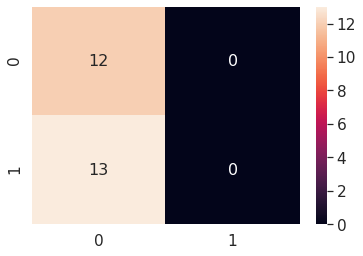

In [10]:
def make_classes(y_pred):
    for i in y_pred:
        if i[0] > 0.5:
            i[0]=1
            i[1]=0
        elif i[0] <= 0.5:
            i[1]=1
            i[0]=0
    return y_pred
y_tINV3_pred = InceptionV3_model.predict(X_test)
make_classes(y_tINV3_pred)
testy = y_test[:, 0]
yt_classes = y_tINV3_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = roc_auc_score(testy, yt_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yt_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yt_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yt_classes)
print('F1 score: %f' % f1)
matrix = confusion_matrix(testy, yt_classes)      
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16});# font size

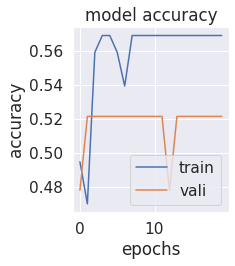

In [11]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend();
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'vali'], loc='lower right')
plt.tight_layout();

In [0]:
#saving the model 
InceptionV3_model.save_weights('InceptionV3_model_wieghts.h5')
model_json = InceptionV3_model.to_json()
with open("InceptionV3_model.json", "w") as json_file:
    json_file.write(model_json)